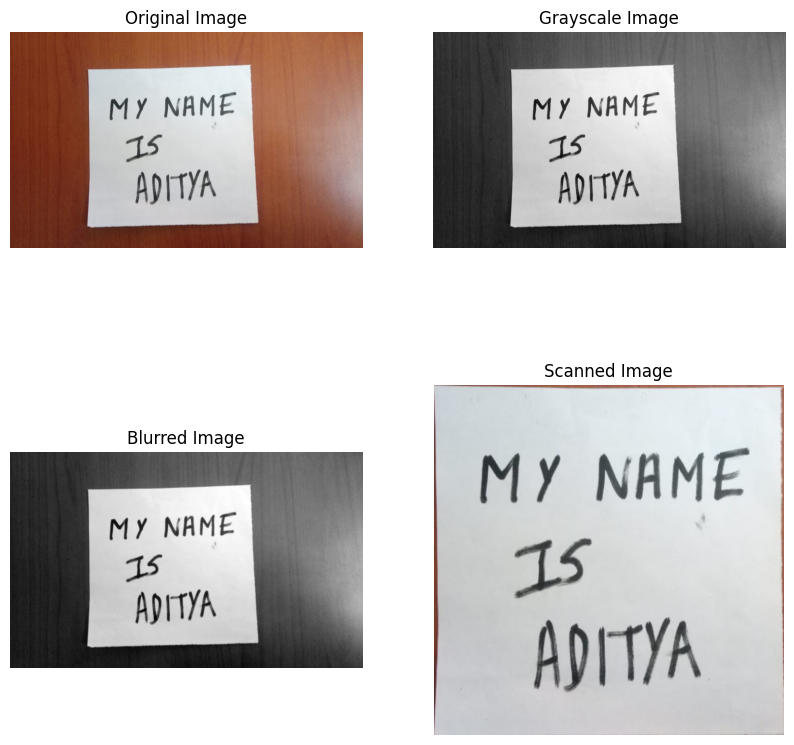

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mapper

# Read in the image
image = cv2.imread("test_img.jpg")
image = cv2.resize(image, (1300, 800))  # Resize the image

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Blur the image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Detect edges using Canny edge detection
edged = cv2.Canny(blurred, 30, 50)

# Find contours
contours, hierarchy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Extract the boundary contours of the page
for c in contours:
    p = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * p, True)

    if len(approx) == 4:
        target = approx
        break

# Find endpoints of the sheet
approx = mapper.mapp(target)

# Map to 800x800 target window
pts = np.float32([[0, 0], [800, 0], [800, 800], [0, 800]])
op = cv2.getPerspectiveTransform(approx, pts)

# Get the top-down (bird's eye) view
dst = cv2.warpPerspective(image, op, (800, 800))

# Display images using Matplotlib
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(gray, cmap='gray')
axes[0, 1].set_title('Grayscale Image')
axes[0, 1].axis('off')

axes[1, 0].imshow(blurred, cmap='gray')
axes[1, 0].set_title('Blurred Image')
axes[1, 0].axis('off')

axes[1, 1].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Scanned Image')
axes[1, 1].axis('off')

plt.show()
